# Prepare Data

In [1]:
#from https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/

import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPRegressor
import itertools
from sklearn.model_selection import cross_validate, RandomizedSearchCV, train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import pickle
df = pd.read_csv("../PreProcessamentoDados/cleanedData.csv")

In [2]:
df[['Hour','Minute','Second']] = df.DateTime.str.split(":",expand=True)

In [3]:
# define a dictionary of column names and their corresponding data types
dtypes_dict = {'Hour': float, 'Minute': float}

# convert the columns to their corresponding data types
df = df.astype(dtypes_dict)

In [ ]:
df.dtypes

In [5]:
df.head()

,DateTime,Generated power,TemperatureC,DewpointC,PressurehPa,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2,Hour,Minute,Second
0,00:15:00,0.0,11.0,8.0,1021.0,128.333333,8.666667,17.000000,83.000000,0.0,0.0,0.0,0.0,15.0,00
1,00:30:00,0.0,11.0,8.0,1021.0,133.333333,1.333333,19.000000,83.000000,0.0,0.0,0.0,0.0,30.0,00
2,00:45:00,0.0,11.0,8.0,1021.0,127.666667,3.000000,12.333333,82.333333,0.0,0.0,0.0,0.0,45.0,00
3,01:00:00,0.0,11.0,8.0,1021.0,128.000000,1.333333,10.000000,81.000000,0.0,0.0,0.0,1.0,0.0,00
4,01:15:00,0.0,11.0,8.0,1021.0,130.000000,2.666667,11.000000,80.666667,0.0,0.0,0.0,1.0,15.0,00


In [22]:
# Separate Target Variable and Predictor Variables
TargetVariable = ["Generated power"]
Predictors= ["Hour","Minute","TemperatureC","DewpointC","PressurehPa","WindDirectionDegrees","WindSpeedKMH","WindSpeedGustKMH","Humidity","HourlyPrecipMM","dailyrainMM","SolarRadiationWatts_m2"]
df_x = df[Predictors]
df_y = df[TargetVariable]
X=df[Predictors].values
y=df[TargetVariable].values
original_X = X
original_y = y

In [8]:
df_x

,Hour,Minute,TemperatureC,DewpointC,PressurehPa,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
0,0.0,15.0,11.000000,8.000000,1021.0,128.333333,8.666667,17.000000,83.000000,0.0,0.0,0.0
1,0.0,30.0,11.000000,8.000000,1021.0,133.333333,1.333333,19.000000,83.000000,0.0,0.0,0.0
2,0.0,45.0,11.000000,8.000000,1021.0,127.666667,3.000000,12.333333,82.333333,0.0,0.0,0.0
3,1.0,0.0,11.000000,8.000000,1021.0,128.000000,1.333333,10.000000,81.000000,0.0,0.0,0.0
4,1.0,15.0,11.000000,8.000000,1021.0,130.000000,2.666667,11.000000,80.666667,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
63354,22.0,45.0,9.333333,5.000000,1030.0,135.000000,1.666667,3.333333,74.000000,0.0,0.0,0.0
63355,23.0,0.0,9.000000,5.000000,1030.0,135.000000,3.000000,3.666667,74.000000,0.0,0.0,0.0
63356,23.0,15.0,9.000000,5.000000,1030.0,135.000000,2.666667,4.000000,74.000000,0.0,0.0,0.0
63357,23.0,30.0,8.666667,5.000000,1030.0,132.000000,6.000000,5.333333,75.000000,0.0,0.0,0.0


## Use one standardization

### Standard Scaler

In [23]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)


### MinMaxScaler

In [18]:
### Standardization of data ###
from sklearn.preprocessing import MinMaxScaler
PredictorScaler=MinMaxScaler()
TargetVarScaler=MinMaxScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)


In [24]:
# Generating the standardized values of X and y


X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 

In [25]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44351, 12)
(44351, 1)
(19008, 12)
(19008, 1)


In [9]:
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=10, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=8, kernel_initializer='normal', activation='tanh'))
# model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

In [10]:

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_error'])

In [20]:
# Fitting the ANN to the Training set
history=model.fit(X_train, y_train ,batch_size = 15, epochs = 100, verbose=1, validation_split= 0.33)


Epoch 1/100
1981/1981 [==============================] - 3s 2ms/step - loss: 0.1161 - mean_absolute_error: 0.1791 - val_loss: 0.1110 - val_mean_absolute_error: 0.1863
Epoch 2/100
1981/1981 [==============================] - 3s 2ms/step - loss: 0.1156 - mean_absolute_error: 0.1788 - val_loss: 0.1108 - val_mean_absolute_error: 0.1757
Epoch 3/100
1981/1981 [==============================] - 3s 2ms/step - loss: 0.1153 - mean_absolute_error: 0.1793 - val_loss: 0.1114 - val_mean_absolute_error: 0.1821
Epoch 4/100
1981/1981 [==============================] - 3s 2ms/step - loss: 0.1152 - mean_absolute_error: 0.1776 - val_loss: 0.1122 - val_mean_absolute_error: 0.1837
Epoch 5/100
1981/1981 [==============================] - 3s 2ms/step - loss: 0.1152 - mean_absolute_error: 0.1780 - val_loss: 0.1083 - val_mean_absolute_error: 0.1692
Epoch 6/100
1981/1981 [==============================] - 3s 2ms/step - loss: 0.1148 - mean_absolute_error: 0.1769 - val_loss: 0.1091 - val_mean_absolute_error: 0.178

# Hyperparameter tuning of ANN


# Finding best set of parameters using manual grid search


In [ ]:
import numpy as np

# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_error'])

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=1)

            mean_squared_error, mean_absolute_error = model.evaluate(X_test,y_test)

            # print("y_test: ",y_test)
            predictions = model.predict(X_test)
            # print("model.predict(X_test)",predictions)
            MAPE = np.mean(100 * (np.abs(y_test-predictions)/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'MAPE:',MAPE,'Accuracy:', 100-MAPE,'mean_squared_error: ',mean_squared_error,
                  'mean_absolute_error: ',mean_absolute_error)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE,mean_squared_error,mean_absolute_error]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy','mean_squared_error','mean_absolute_error'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

In [ ]:
ResultsData

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='mean_squared_error',figsize=(15,4), kind='line')

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='mean_absolute_error',figsize=(15,4), kind='line')

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [ ]:

# importing package
import matplotlib.pyplot as plt
import numpy as np

x = ResultsData["Parameters"]  

# plot lines
plt.plot(x, ResultsData["mean_squared_error"], label = "mean squared")
plt.plot(ResultsData["Parameters"], ResultsData["mean_absolute_error"], label = "mean absolute")
plt.legend()
plt.show()

#### Results Data to CSV

In [ ]:
ResultsData.to_csv('ResultsData.csv', index=False)

#### Load Results Data

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame with custom options
LoadedResultsData = pd.read_csv('ResultsData.csv', delimiter=',', encoding='utf-8', header=0, names=['TrialNumber','Parameters','Accuracy','mean_squared_error','mean_absolute_error'])

# Display the DataFrame
print(LoadedResultsData)


In [ ]:
%matplotlib inline
LoadedResultsData.plot(x='Parameters', y='mean_squared_error',figsize=(15,4), kind='line')

In [ ]:
%matplotlib inline
LoadedResultsData.plot(x='Parameters', y='mean_absolute_error',figsize=(15,4), kind='line')

# Training the ANN model with the best parameters


In [15]:
# Fitting the ANN to the Training set
#  batch_size = 15, 
#    epochs = 5,
history=model.fit(
    X_train, 
    y_train ,
    batch_size = 15, 
    epochs = 130,     
    verbose=1,
    validation_split = 0.33)

Epoch 1/130
1981/1981 [==============================] - 4s 2ms/step - loss: 0.1098 - mean_absolute_error: 0.1724 - val_loss: 0.1054 - val_mean_absolute_error: 0.1670
Epoch 2/130
1981/1981 [==============================] - 4s 2ms/step - loss: 0.1095 - mean_absolute_error: 0.1725 - val_loss: 0.1055 - val_mean_absolute_error: 0.1707
Epoch 3/130
1981/1981 [==============================] - 3s 2ms/step - loss: 0.1094 - mean_absolute_error: 0.1714 - val_loss: 0.1049 - val_mean_absolute_error: 0.1662
Epoch 4/130
1981/1981 [==============================] - 3s 2ms/step - loss: 0.1093 - mean_absolute_error: 0.1710 - val_loss: 0.1058 - val_mean_absolute_error: 0.1669
Epoch 5/130
1981/1981 [==============================] - 3s 2ms/step - loss: 0.1091 - mean_absolute_error: 0.1708 - val_loss: 0.1070 - val_mean_absolute_error: 0.1661
Epoch 6/130
1981/1981 [==============================] - 4s 2ms/step - loss: 0.1089 - mean_absolute_error: 0.1712 - val_loss: 0.1037 - val_mean_absolute_error: 0.160

#### Mean Squared Error, Mean Absolute Error

In [19]:
mean_squared_error, mean_absolute_error = model.evaluate(X_test,y_test)
print("MSE: ",mean_squared_error)
print("MAE:" ,mean_absolute_error)

594/594 [==============================] - 1s 1ms/step - loss: 0.1076 - mean_absolute_error: 0.1582
MSE:  0.10761170834302902
MAE: 0.15816757082939148


In [27]:
# Generating Predictions on testing data
Predictions=model.predict(X_test)

594/594 [==============================] - 1s 953us/step


#### R2 Score

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,Predictions)

0.8916851839959781

### Pred / Real Comparison

In [29]:


# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Generation']=y_test_orig
TestingData['PredictedGeneration']=Predictions
TestingData.head()

,Hour,Minute,TemperatureC,DewpointC,PressurehPa,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2,Generation,PredictedGeneration
0,15.0,45.0,26.333333,15.666667,1015.0,306.000000,12.333333,27.000000,51.666667,0.0,0.0,710.666667,2065.333333,2257.020264
1,2.0,0.0,19.000000,16.000000,1016.0,196.000000,0.000000,0.000000,83.000000,0.0,0.0,0.000000,0.000000,-1.074893
2,5.0,45.0,19.000000,10.000000,1011.0,98.000000,6.333333,17.000000,56.000000,0.0,0.0,0.000000,0.000000,-5.235476
3,13.0,45.0,27.333333,16.000000,1017.0,285.666667,0.333333,13.333333,49.333333,0.0,0.0,824.666667,5071.333333,4670.899414
4,19.0,30.0,18.000000,15.000000,1014.0,180.333333,1.000000,11.000000,82.666667,0.0,0.0,0.000000,0.000000,73.855347


In [25]:
df_temp = pd.DataFrame({'Actual': y_test_orig, 'Predicted': Predictions})
df_temp.head()

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
TestingData

### Plot Loss

In [15]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [16]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error,epoch
195,0.110421,0.170517,0.106942,0.165131,195
196,0.110247,0.169620,0.105309,0.159363,196
197,0.110233,0.169661,0.104817,0.160714,197
198,0.109862,0.169811,0.105787,0.157290,198
199,0.109796,0.169449,0.106698,0.160104,199


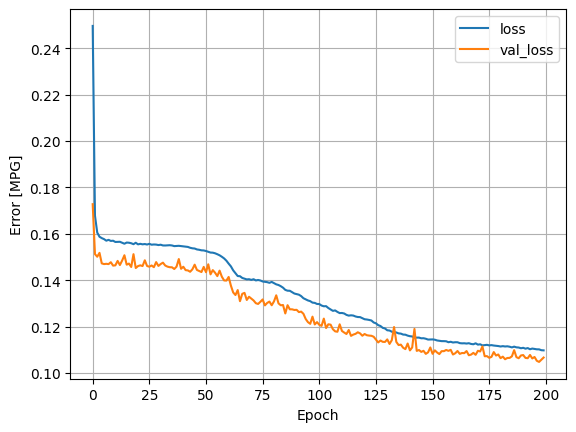

In [17]:
plot_loss(history)

# Save and Load Model

In [2]:
filename = './DNN_finalized_model'


In [14]:
# save the model to disk
model.save(filename)

NameError: name 'model' is not defined

In [3]:
import tensorflow as tf

# load the model from disk
model = tf.keras.models.load_model(filename)

### save to single file - .h5

In [30]:
save_path = './DNN_model.h5'


In [33]:
import tensorflow as tf


In [31]:
## save model single file
model.save(save_path)

In [34]:
## load tensorflow model
model = tf.keras.models.load_model(save_path)

In [35]:
print(type(model))

<class 'keras.engine.sequential.Sequential'>


### Save using pickle

In [21]:
pickle_filename= "./saved_DNN.pkl"

In [15]:
import joblib

In [25]:
pickle.dump(model, open(pickle_filename, 'wb'))

INFO:tensorflow:Assets written to: ram://fe8ad0c1-f1b1-48fb-8b1b-9fe75d3b8225/assets


In [26]:
model = pickle.load(open(pickle_filename, 'rb'))

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://5f4f61f9-9cb8-4027-82dc-00f90d6a725b/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [36]:
model.layers

In [ ]:
# Fitting the ANN to the Training set
history=model.fit(
    X_train,
    y_train, 
    batch_size = 30,
    epochs = 200,
    verbose=1,
    validation_split = 0.33)


In [ ]:
model.summary()

# Explainable AI Shap

In [23]:

import shap
import numpy as np

# select a set of background examples to take an expectation over
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

c:\Users\rafae\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
import shap

explainer = shap.DeepExplainer(model, background)


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [25]:
shap_values = explainer.shap_values(X_test[1:100])

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [27]:
shap_values

[array([[-1.68849351e-01, -4.59579317e-03,  6.78882074e-04, ...,
          0.00000000e+00,  0.00000000e+00, -4.35601018e-01],
        [-1.67048782e-01,  1.12952883e-02,  3.18244101e-03, ...,
          0.00000000e+00,  0.00000000e+00, -4.08045558e-01],
        [ 6.48089213e-01, -7.61436606e-02,  1.16580426e-01, ...,
          0.00000000e+00,  0.00000000e+00,  2.42317476e+00],
        ...,
        [-2.37279239e-01,  1.15904506e-02, -2.24955262e-02, ...,
          0.00000000e+00,  0.00000000e+00, -3.59339714e-01],
        [-1.22369200e-01,  1.29492104e-03, -2.83992959e-02, ...,
          0.00000000e+00,  0.00000000e+00, -4.70893431e-01],
        [-9.32726064e-02, -7.23286108e-03, -7.70393477e-02, ...,
          0.00000000e+00,  0.00000000e+00, -4.75574969e-01]])]

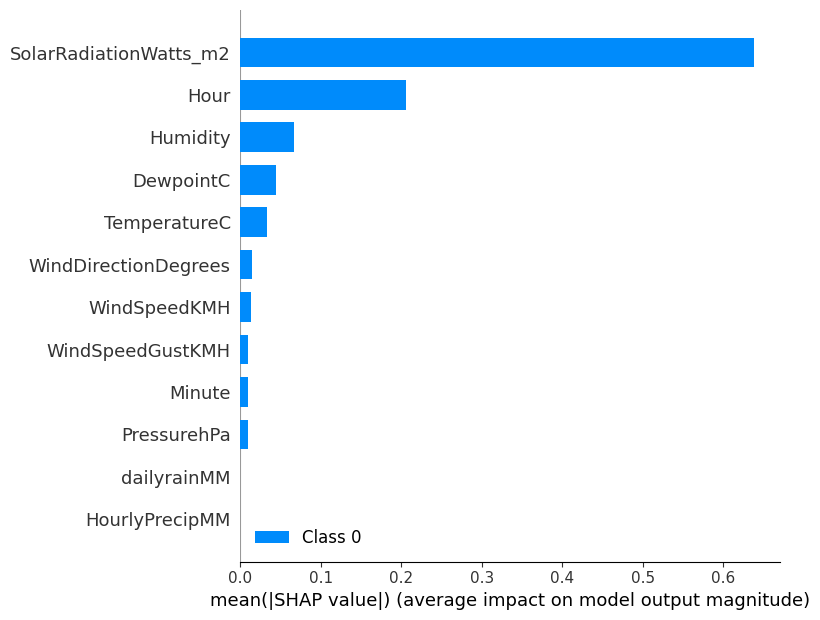

In [28]:
shap.summary_plot(shap_values,df_x.columns)

In [ ]:
# plot the feature attributions
shap.image_plot(shap_values, -X_test[1:100])

#### Save Shap Values

In [ ]:
import pickle
pickle.dump(shap_values, open("shap_values.bin", "wb"))

In [9]:
import pickle
matrix = pickle.load(open("shap_values.bin", "rb"))

In [30]:
import shap
shap.summary_plot(matrix,X_test)

NameError: name 'matrix' is not defined

In [ ]:
matrix

In [ ]:
with pd.option_context('display.max_rows', None,
                        'display.max_columns', None,
                        'display.precision', 3,                        ):
    print(matrix)

In [ ]:
print(shap.__version__)
print(tf.__version__)
